In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coleridgeinitiative-show-us-the-data/sample_submission.csv
/kaggle/input/coleridgeinitiative-show-us-the-data/train.csv
/kaggle/input/coleridgeinitiative-show-us-the-data/test/8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60.json
/kaggle/input/coleridgeinitiative-show-us-the-data/test/2100032a-7c33-4bff-97ef-690822c43466.json
/kaggle/input/coleridgeinitiative-show-us-the-data/test/2f392438-e215-4169-bebf-21ac4ff253e1.json
/kaggle/input/coleridgeinitiative-show-us-the-data/test/3f316b38-1a24-45a9-8d8c-4e05a42257c6.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/f8b03c87-9d1a-4f20-b76b-cb6c69d447b2.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/585ba241-6348-41ce-a5d2-c9ee434cd64d.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/bde73ad6-ce46-489b-8ee0-b162698cc6df.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/c7ce1ac6-36e4-4258-b2e4-1b525dc82ad5.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/9d75e205-3030-44c6-ae

In [2]:
# Path
from fastcore.all import *

import re

import matplotlib.pyplot as plt
import matplotlib as mpl

# wordcloud & Pretreatment
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [3]:
dataset_path = Path('../input/coleridgeinitiative-show-us-the-data')

In [4]:
train_df = pd.read_csv("../input/coleridgeinitiative-show-us-the-data/train.csv")
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [5]:
title = train_df.dataset_title.unique()
n = 1 # 라벨 몇개까지 할껀지
for i in range(n):
#     print(i,"th")
    ind = np.where(train_df.dataset_label == title[i])
    if i!=2 :
        txt = ''
        ind = np.array(ind)
        id = train_df.Id[ind[0,0]]
        json = pd.read_json(dataset_path/'train'/(id+'.json'))
        for j in range(len(json['text'])):
            txt += json['text'][j]
        print(txt)

This study used data from the National Education Longitudinal Study (NELS:88) to examine the effects of dual enrollment programs for high school students on college degree attainment. The study also reported whether the impacts of dual enrollment programs were different for first generation college students versus students whose parents had attended at least some college. In addition, a supplemental analysis reports on the impact of different amounts of dual enrollment course-taking and college degree attainment.
Dual enrollment programs offer college-level learning experiences for high school students. The programs offer college courses and/or the opportunity to earn college credits for students while still in high school.
The intervention group in the study was comprised of NELS participants who attended a postsecondary school and who participated in a dual enrollment program while in high school (n = 880). The study author used propensity score matching methods to create a compariso

In [6]:
# 특수문자 제거
txt = re.sub('[^a-zA-Z]', ' ', txt)
txt

'This study used data from the National Education Longitudinal Study  NELS     to examine the effects of dual enrollment programs for high school students on college degree attainment  The study also reported whether the impacts of dual enrollment programs were different for first generation college students versus students whose parents had attended at least some college  In addition  a supplemental analysis reports on the impact of different amounts of dual enrollment course taking and college degree attainment  Dual enrollment programs offer college level learning experiences for high school students  The programs offer college courses and or the opportunity to earn college credits for students while still in high school  The intervention group in the study was comprised of NELS participants who attended a postsecondary school and who participated in a dual enrollment program while in high school  n         The study author used propensity score matching methods to create a comparis

In [7]:
lower_txt = txt.lower()
word = lower_txt.split()
print(len(word))
print(word[:20])

1771
['this', 'study', 'used', 'data', 'from', 'the', 'national', 'education', 'longitudinal', 'study', 'nels', 'to', 'examine', 'the', 'effects', 'of', 'dual', 'enrollment', 'programs', 'for']


In [8]:
word = [i for i in word if not i in stopwords.words('english')]
print(len(word))
print(word[:20])

1048
['study', 'used', 'data', 'national', 'education', 'longitudinal', 'study', 'nels', 'examine', 'effects', 'dual', 'enrollment', 'programs', 'high', 'school', 'students', 'college', 'degree', 'attainment', 'study']


In [9]:
# # steming
# stemmer = SnowballStemmer('english')
# word = [stemmer.stem(w) for w in word]
# print(len(word))
# print(word[:20])

In [10]:
# Lemmatization(음소표기법)
wordnet_lemmatizer = WordNetLemmatizer()
word = [ wordnet_lemmatizer.lemmatize(w) for w in word]
print(len(word))
print(word[:20])

1048
['study', 'used', 'data', 'national', 'education', 'longitudinal', 'study', 'nels', 'examine', 'effect', 'dual', 'enrollment', 'program', 'high', 'school', 'student', 'college', 'degree', 'attainment', 'study']


In [11]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=1000, height=800 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

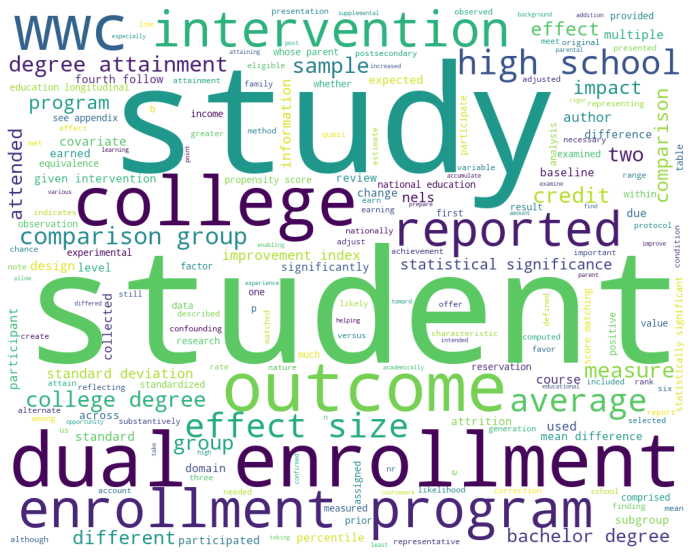

In [12]:
displayWordCloud(' '.join(word))

In [13]:
test1 = pd.read_json('../input/coleridgeinitiative-show-us-the-data/test/2100032a-7c33-4bff-97ef-690822c43466.json')
test2 = pd.read_json('../input/coleridgeinitiative-show-us-the-data/test/2f392438-e215-4169-bebf-21ac4ff253e1.json')
test3 = pd.read_json('../input/coleridgeinitiative-show-us-the-data/test/3f316b38-1a24-45a9-8d8c-4e05a42257c6.json')
test4 = pd.read_json('../input/coleridgeinitiative-show-us-the-data/test/8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60.json')

In [14]:
test1_txt = ''
for i in range(len(test1['text'])):
    test1_txt += test1['text'][i]

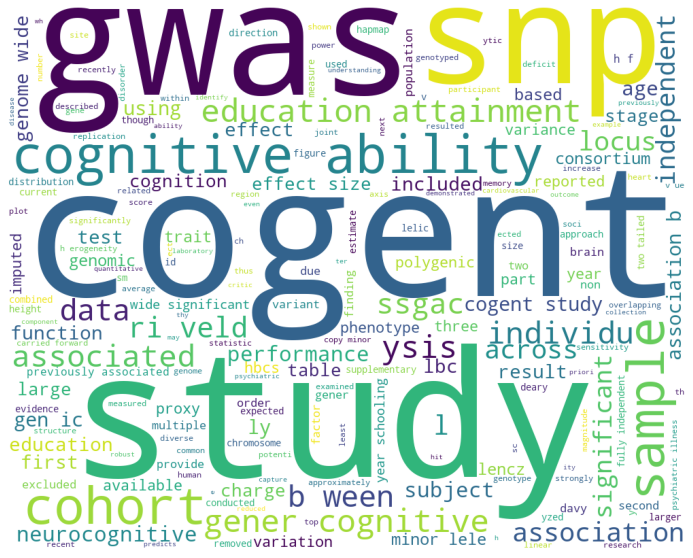

In [15]:
test1_txt = re.sub('[^a-zA-Z]', ' ', test1_txt)
test1_txt = test1_txt.lower()
test1_txt = re.sub(r'(?:\b[0-9a-z]\b|[?!\W]+)\s*', ' ', test1_txt)
test1_txt = re.sub('et', ' ', test1_txt)
test1_txt = re.sub('al', ' ', test1_txt)
test1_txt = test1_txt.split()
test1_txt = [i for i in test1_txt if not i in stopwords.words('english')]
test1_txt = [ wordnet_lemmatizer.lemmatize(w) for w in test1_txt]
displayWordCloud(' '.join(test1_txt))

In [16]:
test2_txt = ''
for i in range(len(test2['text'])):
    test2_txt += test2['text'][i]

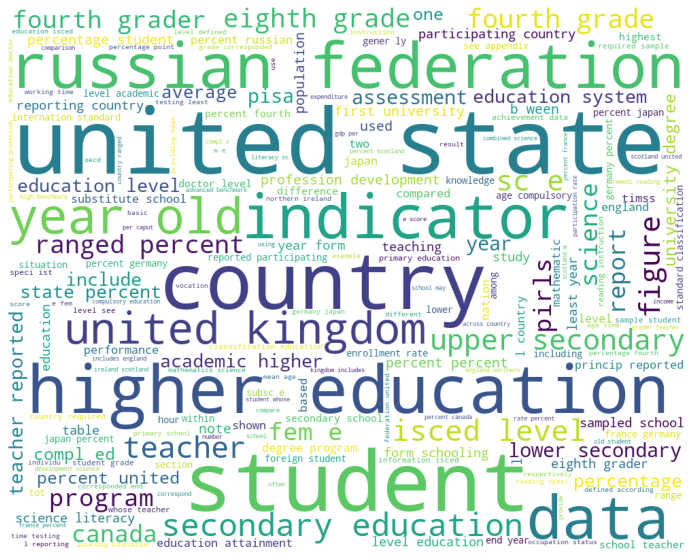

In [17]:
test2_txt = re.sub('[^a-zA-Z]', ' ', test2_txt)
test2_txt = test2_txt.lower()
test2_txt = re.sub(r'(?:\b[0-9a-z]\b|[?!\W]+)\s*', ' ', test2_txt)
test2_txt = re.sub('et', ' ', test2_txt)
test2_txt = re.sub('al', ' ', test2_txt)
test2_txt = test2_txt.split()
test2_txt = [i for i in test2_txt if not i in stopwords.words('english')]
test2_txt = [ wordnet_lemmatizer.lemmatize(w) for w in test2_txt]
displayWordCloud(' '.join(test2_txt))

In [18]:
test3_txt = ''
for i in range(len(test3['text'])):
    test3_txt += test3['text'][i]

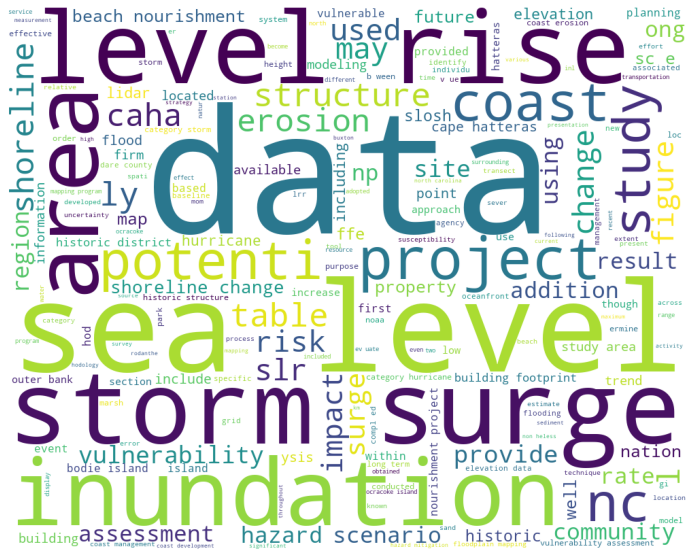

In [19]:
test3_txt = re.sub('[^a-zA-Z]', ' ', test3_txt)
test3_txt = test3_txt.lower()
test3_txt = re.sub(r'(?:\b[0-9a-z]\b|[?!\W]+)\s*', ' ', test3_txt)
test3_txt = re.sub('et', ' ', test3_txt)
test3_txt = re.sub('al', ' ', test3_txt)
test3_txt = test3_txt.split()
test3_txt = [i for i in test3_txt if not i in stopwords.words('english')]
test3_txt = [ wordnet_lemmatizer.lemmatize(w) for w in test3_txt]
displayWordCloud(' '.join(test3_txt))

In [20]:
test4_txt = ''
for i in range(len(test4['text'])):
    test4_txt += test4['text'][i]

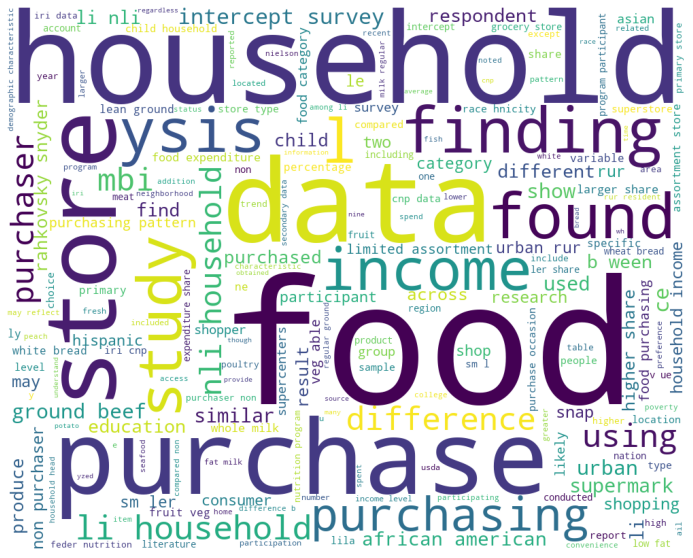

In [21]:
test4_txt = re.sub('[^a-zA-Z]', ' ', test4_txt)
test4_txt = test4_txt.lower()
test4_txt = re.sub(r'(?:\b[0-9a-z]\b|[?!\W]+)\s*', ' ', test4_txt)
test4_txt = re.sub('et', ' ', test4_txt)
test4_txt = re.sub('al', ' ', test4_txt)
test4_txt = test4_txt.split()
test4_txt = [i for i in test4_txt if not i in stopwords.words('english')]
test4_txt = [ wordnet_lemmatizer.lemmatize(w) for w in test4_txt]
displayWordCloud(' '.join(test4_txt))